You have been given 2 files :



### 1. "trades_file.csv" : contains the intraday trades made by a trading system .

column names :

time -> time of trade

symbol -> symbol of the instrument in which the trade is made

tradeSize -> quantities traded in the symbol . tradeSize > 0 if instrument is

bought and tradeSize < 0 , if the instrument is sold

tradePrice -> the price at which the trade in the instrument is made

### 2. "prices_file.csv" : contains 1 min data for the prices of all symbols

column names :

time -> time at which the price is recorded

symbol -> symbol of the instrument

price -> last traded price for the instrument





## Task 1

The trading system made the trades given in the trade file , and whatever
position was left at 15:25:00 was squared off by the system ( Square off
trades not included in the trades file ) . Square off means exiting the current
position by executing opposite trade with same quantity. So if I have -3
position in symbol A , square off trade will have +3 as trade size, with trade
price as given in prices file. Assume that system is able to square off
positions of all symbols at the 15:25:00 price provided in the prices
file.Calculate the profit/loss made the trading system at the end of the day
using information and files provided.

In [143]:
import numpy as np
import pandas as pd


pr = pd.read_csv('Downloads/prices_file (1).csv')
tr = pd.read_csv('Downloads/trades_file (1).csv')
print('Price table')
print(pr.head())
print('trade table')
print(tr.head())

Price table
       time      symbol     price
0  09:16:00  STOCK_5559  2158.950
1  09:16:00  STOCK_3848  2035.325
2  09:16:00  STOCK_3940  1970.325
3  09:16:00  STOCK_3643  1864.125
4  09:16:00  STOCK_3447  1772.025
trade table
       time      symbol  tradeSize  tradePrice
0  09:18:29  STOCK_4487       -1.0       22.95
1  09:18:31  STOCK_3584        4.0       21.80
2  09:18:34  STOCK_3584       -4.0       21.65
3  09:19:18  STOCK_4487       -2.0       19.45
4  09:19:18  STOCK_4487       -2.0       19.45


In [144]:
#assuming Start of Day PnL to be 0

pnl = 0
pr = pd.read_csv('Downloads/prices_file (1).csv')
tr = pd.read_csv('Downloads/trades_file (1).csv')
for i in tr.index:
    pnl = pnl + float(tr.loc[i,['tradeSize']]) * float(tr.loc[i,['tradePrice']])

    
# pd.crosstab(symbol, [q, r], rownames=['p'], colnames=['q', 'r'])

table = pd.pivot_table(tr, values='tradeSize', index=['symbol'],
                     aggfunc=np.sum)
pr = pr.set_index('time')
pr1 = pr.loc['15:25:00']
pr2 = pr1.set_index('symbol')
print(pr2)

# trying to square off the stocks according to the prices at 15:25:00 in price table
sq = 0
for j in table.index:
    sq = sq + (float(-table.loc[j])) * float(pr1.set_index('symbol').loc[j])
    


               price
symbol              
STOCK_5559  2422.300
STOCK_3848  2320.900
STOCK_3940  2221.875
STOCK_3643  2118.800
STOCK_3447  2019.975
...              ...
STOCK_4450  1079.175
STOCK_3138  1180.000
STOCK_5651  1267.700
STOCK_5998  1371.175
STOCK_4198  1456.375

[62 rows x 1 columns]


In [145]:
# Final PnL after sq off
final_pnl  = pnl + sq
print(final_pnl)

3233.425000000011


# Task 2

Report the symbols with max PNL and min PNL .

In [146]:
tr1

,time,tradeSize,tradePrice,before_settle
symbol,,,,
STOCK_4487,09:18:29,-1.0,22.95,-22.95
STOCK_3584,09:18:31,4.0,21.80,87.20
STOCK_3584,09:18:34,-4.0,21.65,-86.60
STOCK_4487,09:19:18,-2.0,19.45,-38.90
STOCK_4487,09:19:18,-2.0,19.45,-38.90
...,...,...,...,...
STOCK_3561,15:14:57,-4.0,95.05,-380.20
STOCK_3561,15:14:59,-1.0,95.25,-95.25
STOCK_3561,15:14:59,1.0,95.10,95.10


In [147]:
tr1 = tr.set_index('symbol')
tr1['before_settle'] = tr1['tradeSize'] * tr1['tradePrice']


tr_before_settle = pd.pivot_table(tr1, values='before_settle', index=['symbol'],aggfunc=np.sum)
tr_before_settle_sort = tr_before_settle.sort_index()

tr_blnce_trade = pd.pivot_table(tr1, values='tradeSize', index=['symbol'],aggfunc=np.sum)
tr_blnce_trade_sort = tr_blnce_trade.sort_index()
pr3 = pr2[pr2.index.isin(tr_before_settle.index)]
pr3_sort = pr3.sort_index()
tr_before_settle_sort['squared_pnl'] = pr3_sort['price'] * (-tr_blnce_trade['tradeSize'])
tr_before_settle_sort['final_pnl_symbol_wise'] = tr_before_settle_sort['before_settle'] + tr_before_settle_sort['squared_pnl']

print('Max Pnl per Symbol : '+ tr_before_settle_sort[tr_before_settle_sort['final_pnl_symbol_wise'] == tr_before_settle_sort['final_pnl_symbol_wise'].max()].index)

print('Max Pnl per Symbol : '+ tr_before_settle_sort[tr_before_settle_sort['final_pnl_symbol_wise'] == tr_before_settle_sort['final_pnl_symbol_wise'].min()].index)

print(tr_before_settle_sort)

Index(['Max Pnl per Symbol : STOCK_3870'], dtype='object', name='symbol')
Index(['Max Pnl per Symbol : STOCK_5628'], dtype='object', name='symbol')


,before_settle,squared_pnl,final_pnl_symbol_wise
symbol,,,
STOCK_3177,1443.85,-716.900,726.950
STOCK_3228,130.10,-1.050,129.050
STOCK_3439,797.75,-1116.100,-318.350
STOCK_3561,862.55,1207.750,2070.300
STOCK_3584,-36.50,-1.050,-37.550
STOCK_3660,0.20,0.300,0.500
STOCK_3870,3131.95,-158.400,2973.550
STOCK_3896,330.90,-4.000,326.900
STOCK_3979,847.15,-841.650,5.500


# Task 3

Use the 2 files to calculate the PNL at each timestamp in the prices files. Use
that to calculate the maximum intraday drawdown . Also draw chart of
intraday PNL ( Time vs PNL ).


In [1]:
import pandas as pd
pr = pd.read_csv('Downloads/prices_file (1).csv')
tr = pd.read_csv('Downloads/trades_file (1).csv')

In [63]:
#assuming Start of Day PnL to be 0

pnl = 0
pnl_list = []

for q in tr.index:
    pnl = pnl + float(tr.loc[q,['tradeSize']]) * float(tr.loc[q,['tradePrice']])
    pnl_list.append(pnl)
    
 

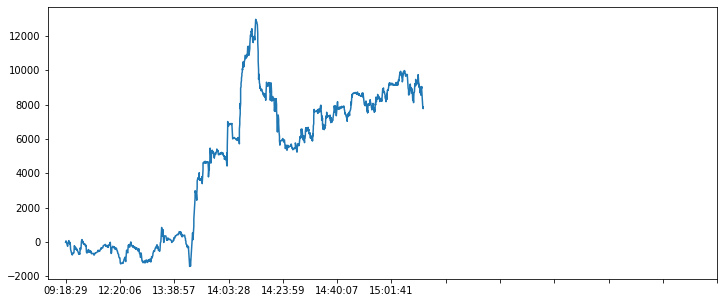

In [65]:
#chart of intraday PNL ( Time vs PNL )
#plotting the PnL for analysing the drawdown graphically which seems to be around 7000

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(tr['time'],pnl_list)
# .plot(times, data)
# plt.xticks(range(len(tr['time'])), tr['time'], size='small',
#            rotation=45, horizontalalignment='center')
plt.xticks(np.arange(0, len(tr['time'])+1, 130))

plt.show()

In [60]:
pnl_list[1:6]

[64.25, -22.349999999999994, -61.24999999999999, -100.14999999999999, -179.55]

In [61]:
#Creating a list of drawdowns that can be used to get the maximum drawdown
# Note that this list will not provide us the day-wise drawdowns

list_ddwn = []
for i in range(1, len(pnl_list)):
    val = max(pnl_list[0:i]) - min(pnl_list[i:len(pnl_list)])
    list_ddwn.append(val)

In [66]:
# Extracting the maximum intraday drawdown

max(list_ddwn)

7732.549999999997